In [1]:
'''
!pip install -q transformers==4.37.2 --quiet
!pip install pydot --quiet
'''
#!pip install tensorflow==2.9.1

'\n!pip install -q transformers==4.37.2 --quiet\n!pip install pydot --quiet\n'

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
from transformers import BertTokenizer
import sys
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')


os.chdir('/content/drive/My Drive/Colab Notebooks/w266_project')
df = pd.read_csv(f"/content/drive/My Drive/Colab Notebooks/w266_project/join_df.csv", header = 0, sep="\t", index_col=0)

# Import custom module with helper functions
sys.path.append('/content/drive/My Drive/Colab Notebooks/w266_project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import corrstats as corr

(-0.8912799047605414, 0.3749185174912557)
(1.0171097212822693, 0.3091012362386931)


In [5]:
# Test/train split
X = np.vstack(df['Abstract'])
y = df['JIF']
train_texts, valid_texts, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=42)
valid_labels = np.array(test_labels)
train_labels = np.array(train_labels)

In [6]:
# Load SciBERT and BERT tokenizers
sci_bert_tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
bert_tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")

max_length = 400
sciBert_encodings = sci_bert_tokenizer(list(valid_texts[:,0]), truncation=True, padding=True, max_length=max_length, return_tensors='tf')
Bert_encodings = bert_tokenizer(list(valid_texts[:,0]), truncation=True, padding=True, max_length=max_length, return_tensors='tf')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [9]:
#Load sciBert regressor
p = os.path.abspath('.')
model_dir = os.path.join(p, 'sciBERT_regressor')
sciBert_reg_model = tf.keras.models.load_model(model_dir)

#Load Bert regressor
model_dir = os.path.join(p, 'BERT_regressor')
Bert_reg_model = tf.saved_model.load(model_dir)

TypeError: VariableSpec.__init__() takes from 2 to 4 positional arguments but 5 were given

In [12]:
model_dir

'/content/drive/MyDrive/Colab Notebooks/w266_project/sciBERT_regressor'

In [8]:
pred_BERT = Bert_reg_model.predict([Bert_encodings.input_ids, Bert_encodings.token_type_ids, Bert_encodings.attention_mask])
pred_sci_BERT = sciBert_reg_model.predict([sciBert_encodings.input_ids, sciBert_encodings.token_type_ids, sciBert_encodings.attention_mask])

NameError: name 'Bert_reg_model' is not defined

In [ ]:
corr.independent_corr()

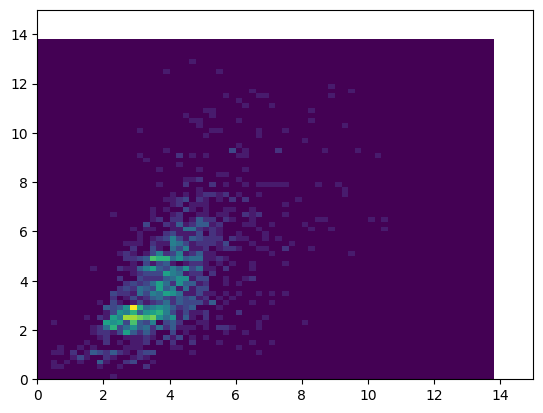

In [ ]:
predictions = predictions.reshape((-1))
fig, ax = plt.subplots()
ax.hist2d(predictions, valid_labels, bins=(np.arange(0, 14, 0.2), np.arange(0, 14, 0.2)))
ax.set_ylim(0,15)
ax.set_xlim(0,15)
plt.show()

In [ ]:
np.corrcoef(predictions, valid_labels)

array([[1.        , 0.56872774],
       [0.56872774, 1.        ]])